<a href="https://colab.research.google.com/github/missanjali456/EDA/blob/main/taxi_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

from numpy import math

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Datsets/NYC Taxi Data.csv')
dataset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
dataset.shape

(1458644, 11)

In [ ]:
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
dataset.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
#let us see the null values in our dataset
dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
#checj unique values in our dataset
dataset.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
#check numeric data present in the dataset
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
#now convert the pickup_datetime and dropoff_datetime to datetime type to objecct type
import datetime as dt

In [ ]:
dataset['pickup_datetime']=pd.to_datetime(dataset['pickup_datetime'])
dataset['dropoff_datetime']=pd.to_datetime(dataset['dropoff_datetime'])

In [ ]:
dataset['pickup_longitude'] = dataset['pickup_longitude'].astype(str)
dataset['pickup_latitude'] = dataset['pickup_latitude'].astype(str)

In [ ]:
#now lets just check again the dtypes of our columns
dataset.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude              object
pickup_latitude               object
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
dataset['pickup_day']=dataset['pickup_datetime'].dt.day_name()
dataset['dropoff_day']=dataset['dropoff_datetime'].dt.day_name()


In [ ]:
dataset['pickup_day_no']=dataset['pickup_datetime'].dt.weekday
dataset['dropoff_day_no']=dataset['dropoff_datetime'].dt.weekday


In [ ]:
dataset['pickup_hour']=dataset['pickup_datetime'].dt.hour
dataset['dropoff_hour']=dataset['dropoff_datetime'].dt.hour

In [ ]:
dataset['pickup_month']=dataset['pickup_datetime'].dt.month
dataset['dropoff_month']=dataset['dropoff_datetime'].dt.month

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
dataset['pickup_timeofday'] = dataset['pickup_hour'].apply(time_of_day)
dataset['dropoff_timeofday'] = dataset['dropoff_hour'].apply(time_of_day)

In [ ]:
dataset.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215484619139,40.76793670654297,-73.964630,40.765602,N,...,Monday,Monday,0,0,17,17,3,3,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98041534423827,40.738563537597656,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night


In [ ]:
from geopy.distance import great_circle

In [ ]:
def find_distance(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude):
  
 start_coordinates=(pickup_latitude,pickup_longitude)
 stop_coordinates=(dropoff_latitude,dropoff_longitude)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
dataset['Distance'] = dataset.apply(lambda x: find_distance(x['pickup_longitude'],x['pickup_latitude'],x['dropoff_longitude'],x['dropoff_latitude']),axis = True)

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215484619139,40.76793670654297,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98041534423827,40.738563537597656,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97902679443358,40.763938903808594,-74.005333,40.710087,N,...,Tuesday,1,1,11,12,1,1,Morning,Afternoon,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004028320312,40.719970703125,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305297851561,40.79320907592773,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590


# univariate data analysis
**--> It involves studying pattern of all variables**

# for our dependent variable trip duration

Text(0, 0.5, 'count')

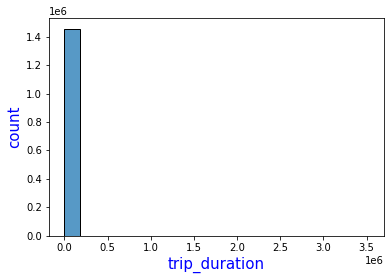

In [ ]:
import seaborn as sns
sns.histplot(dataset['trip_duration'],kde =False, bins=20 )
plt.xlabel('trip_duration' , color='blue',fontsize =15)
plt.ylabel('count', color='blue',fontsize=15)

**--> The histogram is really skewed as we can see.**

**--> Let us also look at the boxplot.**

Text(0, 0.5, 'trip_duration')

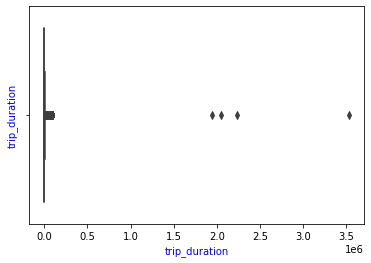

In [ ]:
sns.boxplot(dataset['trip_duration'])
plt.xlabel('trip_duration',color='blue')
plt.ylabel('trip_duration',color='blue')


**--> we can see that outliers are present here**

In [ ]:
dataset['trip_duration'].sort_values(ascending = False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
dataset.drop(dataset[dataset['trip_duration']== 3562682].index ,inplace=True)
dataset.drop(dataset[dataset['trip_duration']==2227612].index ,inplace=True)
dataset.drop(dataset[dataset['trip_duration']==2049578].index,inplace=True)
dataset.drop(dataset[dataset['trip_duration']==1939736].index,inplace=True)

# for vendor id 

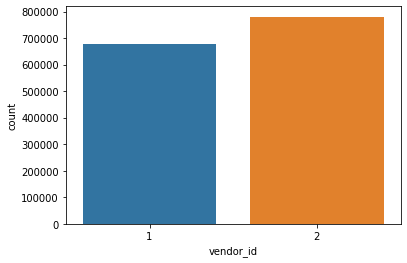

In [ ]:
sns.countplot(x ='vendor_id',data=dataset)

**--> Here we can see clearly their are not much difference between both vendors**

# for passenger count

In [ ]:
dataset.passenger_count.value_counts()

1    1033538
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

**--> There are some trips with even 0 passenger count.**

**--> There is only 1 trip each for 8 and 9 passengers and 3 trips for 7 passengers.**

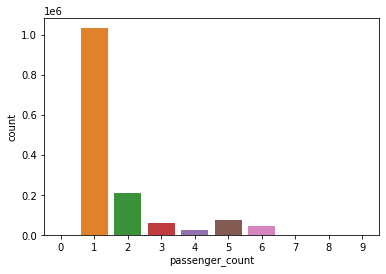

In [ ]:
sns.countplot(x='passenger_count',data=dataset)

**--> we see the highest amount of trips are with 1 passenger.**

**--> Let us remove the rows which have 0 or 7 or 8 or 9 passenger count.**

In [ ]:
dataset = dataset[dataset['passenger_count']!=0]
dataset = dataset[dataset['passenger_count']<=6]

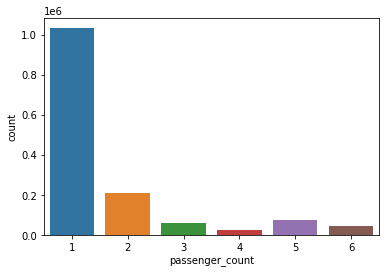

In [ ]:
sns.countplot(x='passenger_count',data=dataset)


**--> now it's seems like a fair distribution**

# for Store and Forward Flag

In [ ]:
dataset['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

--> **We see there are less than 1% of trips that were stored before forwarding**

# for distance

In [ ]:
dataset['Distance'].value_counts()

0.000000    5887
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
3.231345       1
1.584861       1
0.434274       1
3.809274       1
1.134044       1
Name: Distance, Length: 1452306, dtype: int64

--> We see there are 5887 trips with 0 km distance.

--> The reasons for 0 km distance can be:

--> The dropoff location couldn’t be tracked.

--> The driver deliberately took this ride to complete a target ride number.

--> The passengers canceled the trip.

--> We will analyze these trips further in bivariate analysis.

# Trips per day

Text(0.5, 1.0, 'Trips per day')

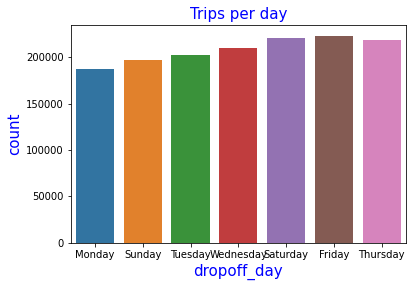

In [ ]:
sns.countplot(x='pickup_day', data=dataset)
plt.xlabel('pickup_day', color="blue", fontsize=15);
plt.ylabel('count',color="blue", fontsize=15);
plt.title('Trips per day',color="blue",fontsize=15)

sns.countplot(x='dropoff_day', data=dataset)
plt.xlabel('dropoff_day', color="blue", fontsize=15);
plt.ylabel('count',color="blue", fontsize=15);
plt.title('Trips per day',color="blue",fontsize=15)

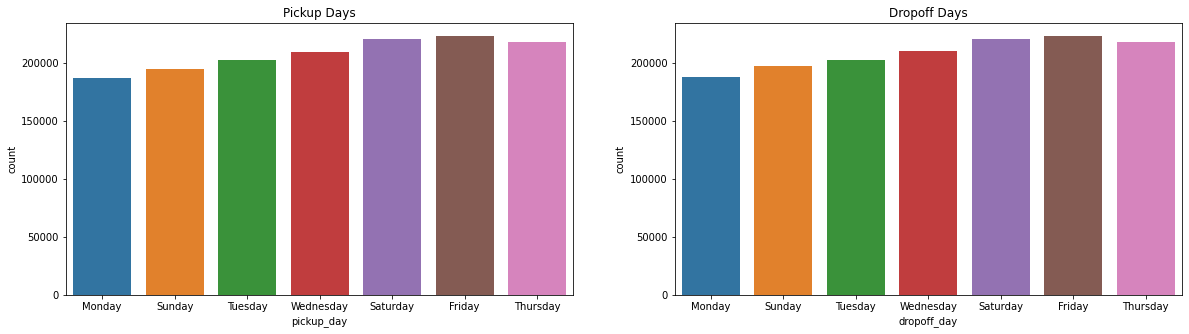

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=dataset,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=dataset,ax=ax2)


**--> We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend**

# Trips per time of day

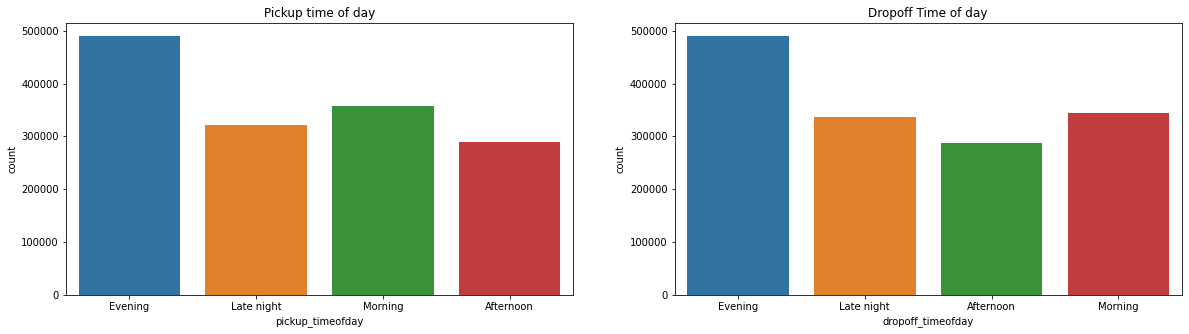

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup time of day')
ax=sns.countplot(x="pickup_timeofday",data=dataset,ax=ax1)
ax2.set_title('Dropoff Time of day')
ax=sns.countplot(x="dropoff_timeofday",data=dataset,ax=ax2)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458576 entries, 0 to 1458643
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458576 non-null  object        
 1   vendor_id           1458576 non-null  int64         
 2   pickup_datetime     1458576 non-null  datetime64[ns]
 3   dropoff_datetime    1458576 non-null  datetime64[ns]
 4   passenger_count     1458576 non-null  int64         
 5   pickup_longitude    1458576 non-null  object        
 6   pickup_latitude     1458576 non-null  object        
 7   dropoff_longitude   1458576 non-null  float64       
 8   dropoff_latitude    1458576 non-null  float64       
 9   store_and_fwd_flag  1458576 non-null  object        
 10  trip_duration       1458576 non-null  int64         
 11  pickup_day          1458576 non-null  object        
 12  dropoff_day         1458576 non-null  object        
 13  pickup_day_n

**--> As we saw above, evenings are the busiest.**

# --> Trips Per Month

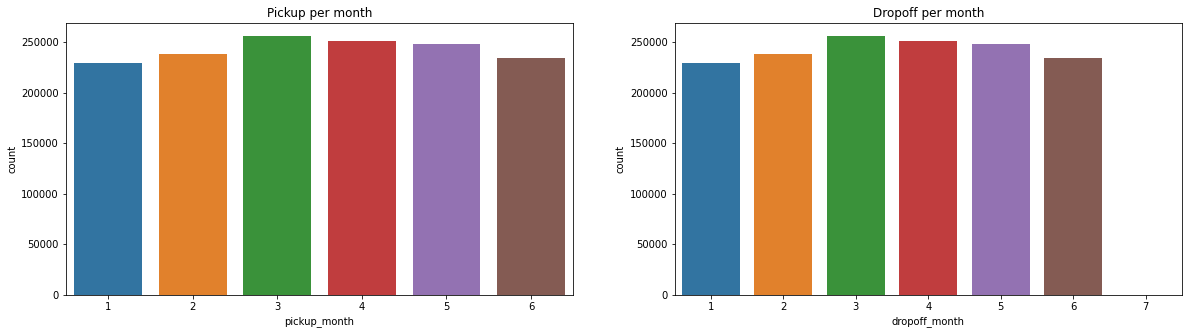

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup per month')
ax=sns.countplot(x="pickup_month",data=dataset,ax=ax1)
ax2.set_title('Dropoff per month')
ax=sns.countplot(x="dropoff_month",data=dataset,ax=ax2)

**--> There is not much difference in the number of trips across months.**

**--> Now, we will analyze all these variables further in bivariate analysis.**

#--> Bivariate Analysis
--> It involves finding relationships, patterns, and correlations between two variables.



# --> Trip Duration per vendor.

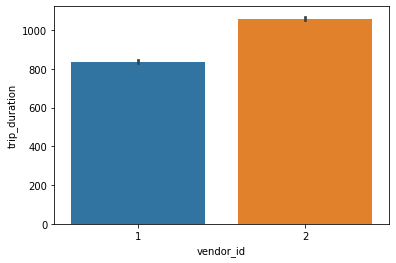

In [ ]:
sns.barplot(y='trip_duration',x='vendor_id',data=dataset,estimator=np.mean)

**--> Vendor id 2 takes longer trips as compared to vendor 1.**

# Trip Duration per Store and Forward Flag

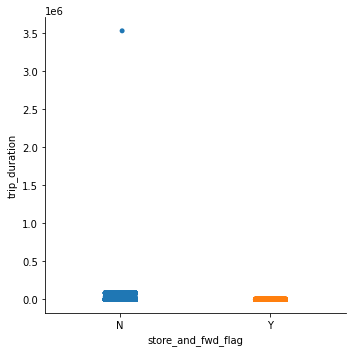

In [ ]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=dataset,kind='strip')

**--> Trip duration is generally longer for trips whose flag was not stored.**

# Trip Duration per passenger count

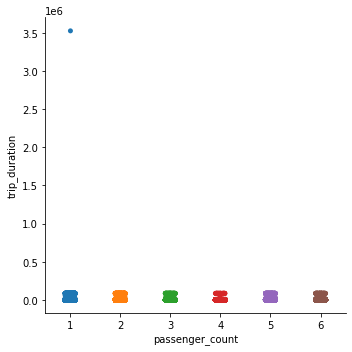

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=dataset,kind='strip')

**--> There is no visible relation between trip duration and passenger count.**

# --> Trip Duration per hour

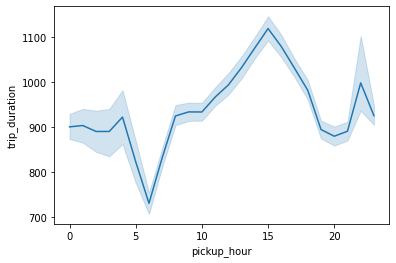

In [ ]:
sns.lineplot(y='trip_duration',x='pickup_hour',data=dataset)

**-->** Trip duration is the lowest around 6 am as streets may not be busy. 

**--> we see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.**



# Trip Duration per time of day


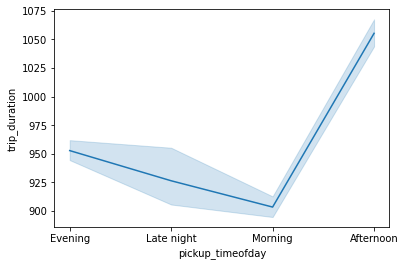

In [ ]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=dataset)

**--> As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.**



# Trip Duration per Day of Week


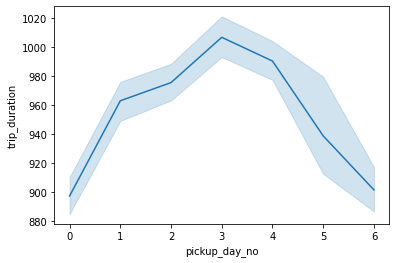

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=dataset)

**--> Trip duration is the longest on Thursdays closely followed by Fridays**.


# Trip Duration per month


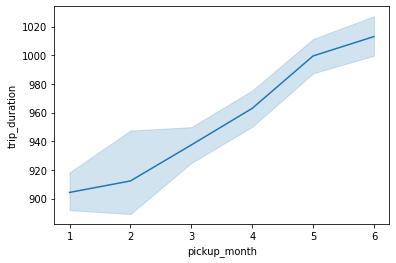

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=dataset)


**--> From February, we can see trip duration rising every month.**

# Distance and Vendor

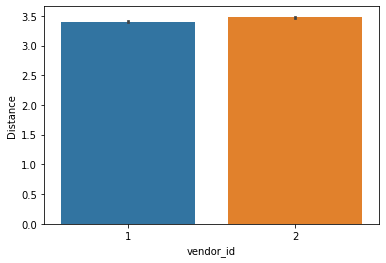

In [ ]:
sns.barplot(y='Distance',x='vendor_id',data=dataset,estimator=np.mean)

**--> The distribution for both vendors is very similar.**

# Distance and store and forward flag

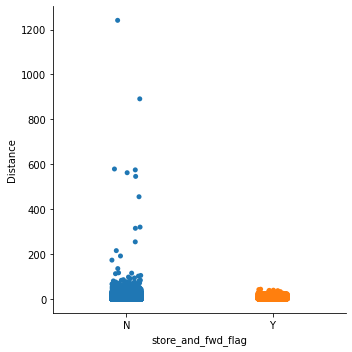

In [ ]:
sns.catplot(y='Distance',x='store_and_fwd_flag',data=dataset,kind='strip')

**--> We see for longer distances the trip is not stored.**

# Distance per passenger count

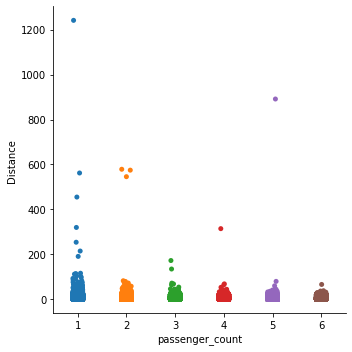

In [ ]:
sns.catplot(y='Distance',x='passenger_count',data=dataset,kind='strip')


**--> We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides.**



# Distance per day of week


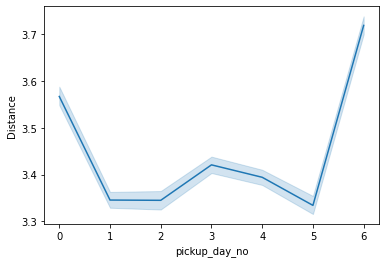

In [ ]:
sns.lineplot(x='pickup_day_no',y='Distance',data=dataset)

**--> Distances are longer on Sundays probably because it’s weekend.**

**--> Monday trip distances are also quite high**.

**--> This probably means that there can be outstation trips on these days and/or the streets are busier.**


# Distance per hour of day


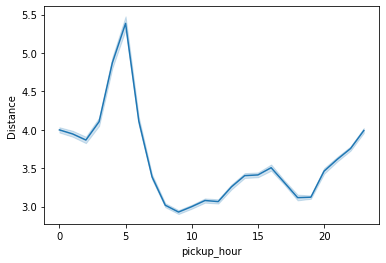

In [ ]:
sns.lineplot(x='pickup_hour',y='Distance',data=dataset)

**--> Distances are the longest around 5 am.**

# Distance per time of day

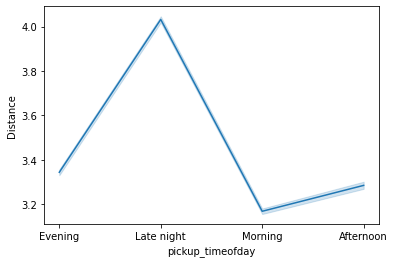

In [ ]:
sns.lineplot(x='pickup_timeofday',y='Distance',data=dataset)

**--> As seen above also, distances being the longest during late night or it maybe called as early morning too.**

**--> This can probably point to outstation trips where people start early for the day**. 

# Distance per month


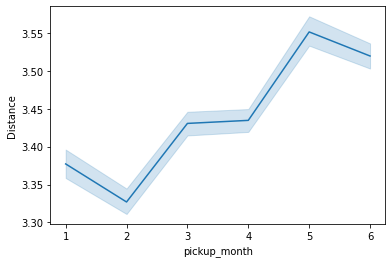

In [ ]:
sns.lineplot(x='pickup_month',y='Distance',data=dataset)

**--> As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.**

# Passenger Count and Vendor id


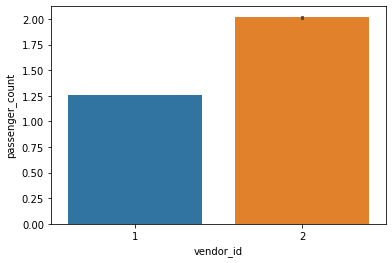

In [ ]:
sns.barplot(y='passenger_count',x='vendor_id',data=dataset)

**--> This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.**



# Trip Duration and Distance


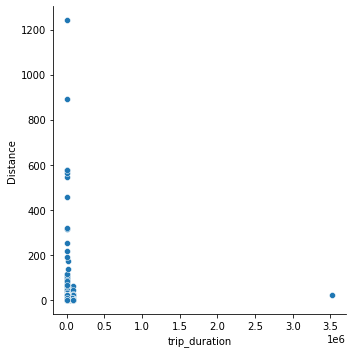

In [ ]:
sns.relplot(y=dataset.Distance,x='trip_duration',data=dataset)


**--> We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.**

# Let us see few rows whose distances are 0.



In [ ]:
dataset[dataset.Distance ==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.98181915283203,40.76896286010742,-73.981819,40.768963,N,...,Monday,0,0,18,18,2,2,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.95906829833984,40.77566146850586,-73.959068,40.775661,N,...,Tuesday,1,1,18,18,5,5,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.80848693847656,40.68733596801758,-73.808487,40.687336,N,...,Monday,0,0,23,23,5,5,Late night,Late night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.78672027587889,40.64704132080078,-73.786720,40.647041,N,...,Monday,0,0,19,19,1,1,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.20985412597656,40.81685256958008,-74.209854,40.816853,N,...,Wednesday,2,2,22,22,1,1,Late night,Late night,0.0


In [ ]:
dataset[dataset.Distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.98181915283203,40.76896286010742,-73.981819,40.768963,N,...,Monday,0,0,18,18,2,2,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.95906829833984,40.77566146850586,-73.959068,40.775661,N,...,Tuesday,1,1,18,18,5,5,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.80848693847656,40.68733596801758,-73.808487,40.687336,N,...,Monday,0,0,23,23,5,5,Late night,Late night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.78672027587889,40.64704132080078,-73.786720,40.647041,N,...,Monday,0,0,19,19,1,1,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.20985412597656,40.81685256958008,-74.209854,40.816853,N,...,Wednesday,2,2,22,22,1,1,Late night,Late night,0.0


**--> We can see even though distance is recorded as 0 but trip duration is definitely more**

**--> One reason can be that the dropoff coordinates weren’t recorded.**

**--> Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.**

**---> So, we see how Exploratory Data Analysis helps us identify underlying patterns in the data, let us draw out conclusions and this even serves as the basis of feature engineering before we start building our model.**



## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
list1 = dataset.select_dtypes(include =['object'])
list1
end=LabelEncoder()
for i in list1:
  dataset[i]=end.fit_transform(dataset[i])
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Distance
0,1049096,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,17612,28281,-73.964630,40.765602,0,...,1,0,0,17,17,3,3,1,1,1.498523
1,867612,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,17384,20581,-73.999481,40.731152,0,...,3,6,6,0,0,6,6,2,2,1.805510
2,1406832,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,17202,27233,-74.005333,40.710087,0,...,5,1,1,11,12,1,1,3,0,6.385108
3,1278146,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,21267,15707,-74.012268,40.706718,0,...,6,2,2,19,19,4,4,1,1,1.485501
4,796050,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,16419,34906,-73.972923,40.782520,0,...,2,5,5,13,13,3,3,0,0,1.188590


# **Lets us now apply Regression model**
**---> Split Dependent variable and Independent variable into x and y and apply train_test_split on it**

In [ ]:
dataset.dtypes

id                             int64
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude               int64
pickup_latitude                int64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
pickup_day                     int64
dropoff_day                    int64
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timeofday               int64
dropoff_timeofday              int64
Distance                     float64
dtype: object

In [ ]:
dataset['Distance'] = dataset['Distance'].astype(float)
dataset['dropoff_longitude'] = dataset['dropoff_longitude'].astype(float)
dataset['dropoff_latitude'] = dataset['dropoff_latitude'].astype(float)


In [ ]:
dataset.dtypes

id                             int64
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude               int64
pickup_latitude                int64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
pickup_day                     int64
dropoff_day                    int64
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timeofday               int64
dropoff_timeofday              int64
Distance                     float64
dtype: object

In [ ]:
dataset.drop(['pickup_datetime'], axis=1,inplace=True)
dataset.drop(['dropoff_datetime'], axis=1,inplace=True)


In [ ]:
x = dataset.drop(['trip_duration'],axis=1)

In [ ]:
y = dataset['trip_duration']

In [ ]:
#now apply tain test split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size =0.2 , random_state = 2)
print(x_train.shape)
print(x_test.shape)

(1166860, 19)
(291716, 19)


In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()